In [7]:
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
import random
import math 

In [8]:
datos = pd.read_csv('data_practica.csv')
print(datos.head())

x_pred = datos.iloc[:,0]
y_real = datos.iloc[:,1]


     x          y
0 -2.0 -177.00000
1 -1.8 -124.54208
2 -1.6  -85.42816
3 -1.4  -56.81664
4 -1.2  -36.32672


In [9]:
# Función objetivo de 2 variables
def funcion_objetivo(a, x):
    f = a[0] + a[1] * x + a[2] * x**2 + a[3] * x**3 + a[4] * x**4 + a[5] * x**5
    return f

In [10]:
def iniciar_poblacion(tam_pob,Imin,Imax):
    Poblacion = []
    for i in range(tam_pob):
        individuo = []
        for j in range(6):
            individuo.append(random.uniform(Imin,Imax))    
        Poblacion.append(individuo)   
    
    return Poblacion 

In [11]:
def evaluar(population):
    fitnes = []
    n = len(x_pred)
    for individuo in population:
        error = 0
        for i in range(n):
            y_pred = funcion_objetivo(individuo, x_pred[i])
            error += (y_real[i] - y_pred) ** 2
        fitnes.append(error / n)
    return fitnes


In [12]:
# Prueba de fitness
poblacion = iniciar_poblacion(3,-2,2)
fitness = evaluar(poblacion)
pob_Fit = list(zip(poblacion, fitness))
print("Poblacion inicial:")
print(pob_Fit)
    

Poblacion inicial:
[([1.2704480167194299, 1.0063813320406396, -0.8065214021259646, 1.8198508252481114, 1.1271292179578905, -1.177926404415207], 4316.185590285922), ([-1.9251230729999045, 1.5883639181151596, 0.26197670888582403, -1.8171177049602578, 0.47299566310099816, -0.463399172659388], 4052.8535679507963), ([1.4531679084386977, -0.009635066470261133, 1.0482506331284682, 1.2303945213269731, -1.6611747705866535, -0.6613882697773081], 2710.5132582479455)]


In [13]:
# Mutacion diferencial
def mutacion_diferencial(population, F):
    nueva_poblacion = []
    tam_pob = len(population)
    for i in range(tam_pob):
        indices = list(range(tam_pob))
        indices.remove(i)
        a, b, c = random.sample(indices, 3)
        individuo_mutado = []
        for j in range(len(population[0])):
            valor_mutado = population[a][j] + F * (population[b][j] - population[c][j])
            individuo_mutado.append(valor_mutado)
        nueva_poblacion.append(individuo_mutado)
    return nueva_poblacion

In [14]:
# Cruce
def cruce(population, mutated_population, CR):
    nueva_poblacion = []
    tam_pob = len(population)
    for i in range(tam_pob):
        individuo_cruzado = []
        for j in range(len(population[0])):
            if random.random() < CR:
                individuo_cruzado.append(mutated_population[i][j])
            else:
                individuo_cruzado.append(population[i][j])
        nueva_poblacion.append(individuo_cruzado)
    return nueva_poblacion


In [15]:
# Seleccion
def seleccion(population, trial_population):
    nueva_poblacion = []
    fit_original = evaluar(population)
    fit_trial = evaluar(trial_population)
    for i in range(len(population)):
        if fit_trial[i] < fit_original[i]:
            nueva_poblacion.append(trial_population[i])
        else:
            nueva_poblacion.append(population[i])
    return nueva_poblacion


In [16]:
# Algoritmo de Evolución Diferencial
tam_pob = 100
Imin = -5.0
Imax = 5.0
F = 0.8
CR = 0.9
generaciones = 100

poblacion = iniciar_poblacion(tam_pob, Imin, Imax)

for gen in range(generaciones):
    poblacion_mutada = mutacion_diferencial(poblacion, F)
    poblacion_cruzada = cruce(poblacion, poblacion_mutada, CR)
    poblacion = seleccion(poblacion, poblacion_cruzada)
    mejor_fitness = min(evaluar(poblacion))
    if gen % 10 == 0:
        print(f"Generacion {gen}: Mejor fitness = {mejor_fitness}")

# Resultados finales

print(f"Mejor individuo final: {poblacion[evaluar(poblacion).index(min(evaluar(poblacion)))]}")


Generacion 0: Mejor fitness = 302.4946001830943
Generacion 10: Mejor fitness = 47.11589841089606
Generacion 20: Mejor fitness = 29.000764681753306
Generacion 30: Mejor fitness = 21.189301913838115
Generacion 40: Mejor fitness = 9.548962340603124
Generacion 50: Mejor fitness = 2.8066334072605983
Generacion 60: Mejor fitness = 2.4451767036643117
Generacion 70: Mejor fitness = 2.115989909270618
Generacion 80: Mejor fitness = 0.44377634916404657
Generacion 90: Mejor fitness = 0.44377634916404657
Mejor individuo final: [0.8869429455826152, 2.6013689776475006, -14.225174501156285, 1.5745949625812559, -3.97143623222831, 1.2398933556438998]


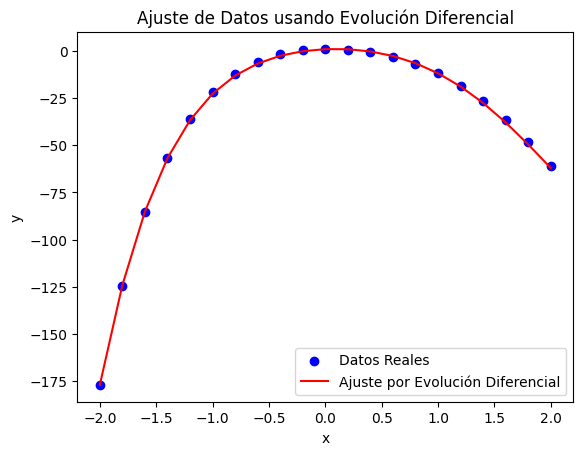

In [17]:
# Grafica los puntos con la ecuacion encontrada
mejor_individuo = poblacion[evaluar(poblacion).index(min(evaluar(poblacion)))]
y_pred_final = [funcion_objetivo(mejor_individuo, x) for x in x_pred]
plt.scatter(x_pred, y_real, color='blue', label='Datos Reales')
plt.plot(x_pred, y_pred_final, color='red', label='Ajuste por Evolución Diferencial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de Datos usando Evolución Diferencial')
plt.legend()
plt.show()